# Libraries

In [1]:
%matplotlib inline

# Google Cloud dependencies
import google.auth
from google.cloud import bigquery
#import datalab.storage as gcs

# dataviz
#import matplotlib as mpl
import matplotlib.pyplot as plt
#from matplotlib import cm
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

# other useful imports
import pandas as pd
import numpy as np
import datetime
import re
from sklearn import linear_model
import scipy

# Main variables

In [2]:
# region pair dict
region_dict = {
        'EU-EU': 'Europe-Europe',
        'NA-NA': 'North America-North America',
        'AS-AS': 'Asia/Pacific-Asia/Pacific',
        'AS-NA': 'Asia/Pacific-North America',
        'AS-EU': 'Asia/Pacific-Europe',
        'EU-NA': 'Europe-North America'
        }
airline='UA'
#regions=['Asia/Pacific-North America','North America-North America', 'Europe-North America']
regions=['North America-North America']

In [3]:
client = bigquery.Client()

# Function that calls SQL code that fetches the IATA tables
def load_table(query_to_load):
    client=bigquery.Client()
    query_job=client.query(query_to_load)
    print("Reading table")
    results = query_job.result().to_dataframe()
    print('Compiled the dataframe')
    df_lines = len(results.index)
    print('Processed {0} lines'.format(df_lines))
    return results

# Skytra airline indices 2018-2020

In [35]:
airline_skytra_index_query="""
            SELECT *
            FROM scratch_ArF.X7_v4_single_airline_index_spot_window_2018_2020_May
            WHERE op_carrier=\'{0}\'
            """.format(airline)

In [36]:
airline_index=load_table(airline_skytra_index_query)
airline_index['first_flight_date'] = pd.to_datetime(airline_index['first_flight_date'])
#airline_index=airline_skytra_index[airline_index['operator']==airline]
airline_index

Reading table
Compiled the dataframe
Processed 7914 lines


,pl_id,region_pair,first_flight_date,op_carrier,iata_index,skytra_index,iata_rpk,skytra_rpk,iata_tickets,skytra_tickets,skytra_coverage
0,0,Africa-North America,2019-05-30,UA,0.101539,NaN,13056.253552,NaN,1,0,0.000000
1,0,Africa-North America,2019-06-09,UA,0.045968,NaN,12907.228668,NaN,1,0,0.000000
2,0,Africa-North America,2019-06-14,UA,0.085695,NaN,11327.178656,NaN,1,0,0.000000
3,0,Africa-North America,2019-08-05,UA,0.037396,NaN,10384.749152,NaN,1,0,0.000000
4,0,Africa-North America,2019-11-05,UA,0.030484,NaN,10724.480826,NaN,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
7909,0,Latin America-Latin America,2019-02-27,UA,0.034189,0.093968,945192.579846,945192.579846,57,57,100.000000
7910,0,Latin America-Latin America,2019-03-11,UA,0.044545,0.181846,909175.872514,909175.872514,57,57,100.000000
7911,0,Latin America-Latin America,2019-04-28,UA,0.056511,0.123226,706366.201978,672733.249054,60,57,95.000000
7912,0,Latin America-Latin America,2019-06-29,UA,0.078563,0.168545,561753.323588,561753.323588,57,57,100.000000


## Skytra airline index dataframe 2018-2020

In [6]:
airline_skytra_index=pd.pivot_table(airline_index, index='first_flight_date', values='skytra_index', columns='region_pair')
airline_skytra_index=airline_skytra_index[regions]
airline_skytra_index

region_pair,North America-North America
first_flight_date,
2017-11-20,0.156886
2017-11-21,0.164558
2017-11-22,0.186156
2017-11-23,0.156101
2017-11-24,0.144471
...,...
2020-05-05,0.127322
2020-05-06,0.133929
2020-05-07,0.125325


## IATA airline index dataframe 2018-2020

In [37]:
airline_iata_index=pd.pivot_table(airline_index, index='first_flight_date', values='iata_index', columns='region_pair')
airline_iata_index=airline_iata_index[regions]
airline_iata_index

region_pair,North America-North America
first_flight_date,
2017-11-20,0.103195
2017-11-21,0.109303
2017-11-22,0.124353
2017-11-23,0.100006
2017-11-24,0.083427
...,...
2020-05-05,0.081398
2020-05-06,0.087636
2020-05-07,0.076281


## IATA ticket count dataframe 2018-2020

In [8]:
airline_iata_tickets=pd.pivot_table(airline_index, index='first_flight_date', values='iata_tickets', columns='region_pair')
airline_iata_tickets=airline_iata_tickets[regions]
airline_iata_tickets

region_pair,North America-North America
first_flight_date,
2017-11-20,55457.0
2017-11-21,51435.0
2017-11-22,60682.0
2017-11-23,43598.0
2017-11-24,25383.0
...,...
2020-05-05,2932.0
2020-05-06,3489.0
2020-05-07,2811.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc09e099890>],
      dtype=object)

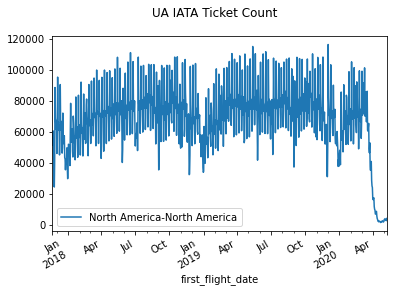

In [9]:
# plot tickets timeseries
airline_iata_tickets.plot(subplots=True, legend=True, title=airline+' IATA Ticket Count')

## Linear regression parameter calibration

In [10]:
# Slicing of the historical indices
airline_skytra_index=airline_skytra_index.loc[datetime.date(2018,1,1):datetime.date(2020,3,31), :]
airline_iata_index=airline_iata_index.loc[datetime.date(2018,1,1):datetime.date(2020,3,31), :]

In [11]:
# calibrating the regression parameters
lin_reg_params_df=pd.DataFrame(index=['slope', 'intercept'])

for region in airline_iata_index.columns:
    
    print('Calibrating the linear regression model for {0}'.format(region))
    
    x_data=airline_iata_index[[region]]
    y_data=airline_skytra_index[region]

    # the lin reg model calibration
    clf = linear_model.LinearRegression()
    clf.fit(x_data, y_data)

    lin_reg_params_df.loc['slope', region]=clf.coef_[0]
    lin_reg_params_df.loc['intercept', region]=clf.intercept_
    lin_reg_params_df.loc['R^2', region]=clf.score(x_data,y_data)
    lin_reg_params_df.loc['correlation', region]=scipy.stats.pearsonr(airline_iata_index[region],
                                                                      airline_skytra_index[region])[0]

Calibrating the linear regression model for North America-North America


In [12]:
lin_reg_params_df

,North America-North America
slope,1.130933
intercept,0.026883
R^2,0.614268
correlation,0.783753


# Historical IATA airline index 2013-2019

In [13]:
airline_iata_index_query="""
            SELECT *
            FROM scratch_ArF.X7_v4_IATA_airline_index_spot_window_2013_2019
            WHERE op_carrier=\'{0}\'
            """.format(airline)

In [14]:
airline_index=load_table(airline_iata_index_query)
airline_index['first_flight_date'] = pd.to_datetime(airline_index['first_flight_date'])
#airline_index=airline_skytra_index[airline_index['op_carrier']==airline]
airline_index

Reading table
Compiled the dataframe
Processed 11024 lines


,region_pair,first_flight_date,op_carrier,IATA_RRPK_USD,IATA_TOT_RPK,iata_tickets
0,Asia/Pacific-Europe,2016-04-08,UA,0.061229,6.273540e+04,3
1,Asia/Pacific-Europe,2016-08-20,UA,0.101884,2.091200e+04,1
2,Asia/Pacific-Europe,2017-01-17,UA,0.013771,1.947120e+04,1
3,Asia/Pacific-Europe,2017-07-07,UA,0.039109,4.138660e+04,1
4,Asia/Pacific-Europe,2018-01-26,UA,0.133809,2.109850e+04,1
...,...,...,...,...,...,...
11019,North America-North America,2019-07-07,UA,0.141309,1.761976e+08,57878
11020,North America-North America,2019-07-11,UA,0.096603,2.262860e+08,72387
11021,North America-North America,2019-08-26,UA,0.111362,3.001905e+08,96886
11022,North America-North America,2019-08-27,UA,0.097196,1.965729e+08,64966


In [15]:
airline_iata_index=pd.pivot_table(airline_index, index='first_flight_date', values='IATA_RRPK_USD', columns='region_pair')
airline_iata_index=airline_iata_index.loc[datetime.date(2016,3,1):datetime.date(2017,12,31), :]
airline_iata_index=airline_iata_index[regions]
airline_iata_index

region_pair,North America-North America
first_flight_date,
2016-03-01,0.104235
2016-03-02,0.102304
2016-03-03,0.092342
2016-03-04,0.091625
2016-03-05,0.080374
...,...
2017-12-27,0.121624
2017-12-28,0.108049
2017-12-29,0.103061


# Modelled Skytra airline index 2016-2020

In [16]:
# modelled dataframe
airline_modelled_skytra_df = pd.DataFrame()

for region in airline_iata_index.columns:
    print('Applying the linear regression model to {0}'.format(region))
    
    airline_modelled_skytra_df[region]=airline_iata_index.loc[datetime.date(2016,1,1):datetime.date(2017,12,31), region]*lin_reg_params_df.loc['slope', region]+\
                                                                lin_reg_params_df.loc['intercept', region]


Applying the linear regression model to North America-North America


In [17]:
# adding the original Skytra 2019 part
airline_modelled_df=pd.DataFrame()
airline_modelled_df=airline_modelled_skytra_df.append(airline_skytra_index)
airline_modelled_df

region_pair,North America-North America
first_flight_date,
2016-03-01,0.144766
2016-03-02,0.142583
2016-03-03,0.131316
2016-03-04,0.130505
2016-03-05,0.117781
...,...
2020-03-27,0.082072
2020-03-28,0.076012
2020-03-29,0.089847


## Modelled Skytra airlines 28d MA Benchmarks

In [18]:
# adding the 28d MA timeseries
rolling_window=28
for region in airline_iata_index.columns:
    print('Calculating the {0}day MA for {1}'.format(rolling_window, region))
    
    ma_region_name=region+' {0}day MA'.format(rolling_window)
    
    airline_modelled_df[ma_region_name]=airline_modelled_df[region].rolling(window=rolling_window).mean()

airline_modelled_df=airline_modelled_df.loc[datetime.date(2017,1,1):, :]
airline_modelled_df

Calculating the 28day MA for North America-North America


region_pair,North America-North America,North America-North America 28day MA
first_flight_date,,
2017-01-01,0.142321,0.144447
2017-01-02,0.163650,0.145077
2017-01-03,0.163054,0.146216
2017-01-04,0.146079,0.146736
2017-01-05,0.124602,0.146816
...,...,...
2020-03-27,0.082072,0.108547
2020-03-28,0.076012,0.107463
2020-03-29,0.089847,0.105879


In [19]:
#gcs.Bucket('archi_temp').item('AF_modelled_indices').write_to(airline_modelled_df.to_csv(),'text/csv')

# Modelled Skytra regional indices 2013-2020

In [20]:
# regional Skytra indices
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
modelled_skytra_df=pd.read_csv('gs://scratch_arf/skytra_full_time_series_divisor_2019_04_14.csv',
                              parse_dates=['first_flight_date'], date_parser=dateparse)
modelled_skytra_df['first_flight_date'] = pd.to_datetime(modelled_skytra_df['first_flight_date'])
modelled_skytra_df=modelled_skytra_df.set_index('first_flight_date')
modelled_skytra_df=modelled_skytra_df[regions]
modelled_skytra_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,North America-North America
first_flight_date,
2013-02-02,0.125487
2013-02-03,0.148067
2013-02-04,0.171797
2013-02-05,0.158995
2013-02-06,0.158071
...,...
2020-04-04,0.084033
2020-04-05,0.082975
2020-04-06,0.082331


## Modelled Skytra 28d MA Benchmarks

In [21]:
# adding the 28d MA timeseries
rolling_window=28
for region in modelled_skytra_df.columns:
    print('Calculating the {0}day MA for {1}'.format(rolling_window, region))
    
    ma_region_name=region+' {0}day MA'.format(rolling_window)
    
    modelled_skytra_df[ma_region_name]=modelled_skytra_df[region].rolling(window=rolling_window).mean()

modelled_skytra_df=modelled_skytra_df.loc[datetime.date(2017,1,1):datetime.date(2020,3,31), :]
modelled_skytra_df

Calculating the 28day MA for North America-North America


,North America-North America,North America-North America 28day MA
first_flight_date,,
2017-01-01,0.149312,0.150323
2017-01-02,0.182456,0.151212
2017-01-03,0.176751,0.152461
2017-01-04,0.155810,0.152948
2017-01-05,0.129776,0.152877
...,...,...
2020-03-27,0.098174,0.133611
2020-03-28,0.089998,0.132138
2020-03-29,0.104733,0.130060


In [22]:
#gcs.Bucket('archi_temp').item('skytra_modelled_indices').write_to(modelled_skytra_df.to_csv(),'text/csv')

## IATA 28d MA Benchmarks

In [39]:
# adding the 28d MA timeseries
rolling_window=28
for region in regions:
    print('Calculating the {0}day MA for {1}'.format(rolling_window, region))
    
    ma_region_name=region+' {0}day MA'.format(rolling_window)
    
    airline_iata_index[ma_region_name]=airline_iata_index[region].rolling(window=rolling_window).mean()

airline_iata_index=airline_iata_index.loc[datetime.date(2018,1,1):datetime.date(2020,3,31), :]
airline_iata_index

Calculating the 28day MA for North America-North America


region_pair,North America-North America,North America-North America 28day MA
first_flight_date,,
2018-01-01,0.092868,0.096329
2018-01-02,0.119644,0.097585
2018-01-03,0.101174,0.098169
2018-01-04,0.079194,0.098130
2018-01-05,0.072596,0.097864
...,...,...
2020-03-27,0.062014,0.081472
2020-03-28,0.056063,0.080841
2020-03-29,0.067791,0.079860


In [46]:
iata_index_query="""
            SELECT *
            FROM index.X7_IATA
            ORDER BY first_flight_date
            """
iata_index=load_table(iata_index_query)
iata_index['first_flight_date'] = pd.to_datetime(iata_index['first_flight_date'])
iata_index=pd.pivot_table(iata_index, index='first_flight_date', values='IATA_RRPK_USD', columns='region_pair')
iata_index=iata_index[regions]
iata_index

Reading table
Compiled the dataframe
Processed 75532 lines


region_pair,North America-North America
first_flight_date,
2013-02-02,0.085626
2013-02-03,0.103459
2013-02-04,0.122200
2013-02-05,0.112089
2013-02-06,0.111359
...,...
2020-06-20,0.089946
2020-06-21,0.099887
2020-06-22,0.102913


In [47]:
# adding the 28d MA timeseries
rolling_window=28
for region in regions:
    print('Calculating the {0}day MA for {1}'.format(rolling_window, region))
    
    ma_region_name=region+' {0}day MA'.format(rolling_window)
    
    iata_index[ma_region_name]=iata_index[region].rolling(window=rolling_window).mean()

iata_index=iata_index.loc[datetime.date(2018,1,1):datetime.date(2020,3,31), :]
iata_index

Calculating the 28day MA for North America-North America


region_pair,North America-North America,North America-North America 28day MA
first_flight_date,,
2018-01-01,0.105431,0.103204
2018-01-02,0.127591,0.104386
2018-01-03,0.110958,0.104971
2018-01-04,0.089469,0.104984
2018-01-05,0.083498,0.104788
...,...,...
2020-03-27,0.066934,0.091143
2020-03-28,0.058640,0.090295
2020-03-29,0.072630,0.089101


# Airline index plotting

Plotting UA index graphs for North America-North America


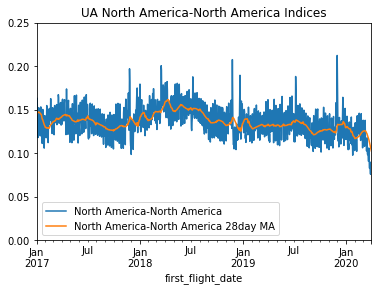

In [23]:
# Plot airline index and benchmark
for region in regions:
    print('Plotting {0} index graphs for {1}'.format(airline, region))
    
    ma_region_name=region+' {0}day MA'.format(rolling_window)
    
    airline_plot_df=pd.DataFrame()
    airline_plot_df[region]=airline_modelled_df[region]
    airline_plot_df[ma_region_name]=airline_modelled_df[ma_region_name]
    airline_plot_df.plot(ylim = [0, 0.25], legend=True, title=airline+' '+region+' Indices')

# Airline vs regional index plotting

Plotting UA vs regional 28d MA benchmark graphs for North America-North America


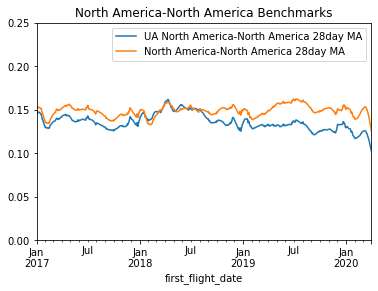

In [24]:
# Plot airline and Skytra benchmark
plt.close('all')
for region in regions:
    print('Plotting {0} vs regional {1}d MA benchmark graphs for {2}'.format(airline, rolling_window, region))
    
    ma_region_name=region+' {0}day MA'.format(rolling_window)
    
    airline_plot_df=pd.DataFrame()
    airline_plot_df[airline+' '+ma_region_name]=airline_modelled_df[ma_region_name]
    airline_plot_df[ma_region_name]=modelled_skytra_df[ma_region_name]
    airline_plot_df.plot(ylim = [0, 0.25], legend=True, title=region+' Benchmarks')
    #plt.close('all')

Plotting UA vs regional 28d MA benchmark graphs for North America-North America


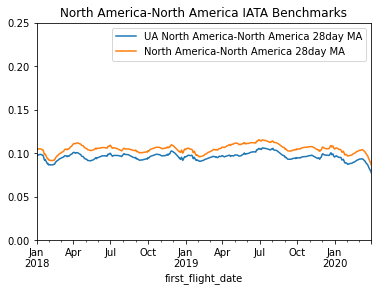

In [49]:
# Plot airline and Skytra benchmark
plt.close('all')
for region in regions:
    print('Plotting {0} vs regional {1}d MA benchmark graphs for {2}'.format(airline, rolling_window, region))
    
    ma_region_name=region+' {0}day MA'.format(rolling_window)
    
    airline_plot_df=pd.DataFrame()
    airline_plot_df[airline+' '+ma_region_name]=airline_iata_index[ma_region_name]
    airline_plot_df[ma_region_name]=iata_index[ma_region_name]
    airline_plot_df.plot(ylim = [0, 0.25], legend=True, title=region+' IATA Benchmarks')
    #plt.close('all')

# Airline vs regional benchmark correlation

## Airline vs regional benchmark correlation 2017-2020

In [25]:
# correlation table
correlation_df=pd.DataFrame()

for region in airline_iata_index.columns:
    
    ma_region_name=region+' {0}day MA'.format(rolling_window)
    
    print('Calculating the correlation between Skytra & {2} {0}d MA for {1}'.format(rolling_window, region, airline))
    correlation_df.loc['correlation', region]=scipy.stats.pearsonr(modelled_skytra_df.loc[datetime.date(2017,1,1):datetime.date(2020,3,31), ma_region_name], 
                            airline_modelled_df.loc[datetime.date(2017,1,1):datetime.date(2020,3,31), ma_region_name])[0]

correlation_df

Calculating the correlation between Skytra & UA 28d MA for North America-North America


,North America-North America
correlation,0.34909


## Airline vs regional benchmark correlation 2017-2019

In [26]:
# correlation table
correlation_df=pd.DataFrame()

for region in airline_iata_index.columns:
    
    ma_region_name=region+' {0}day MA'.format(rolling_window)
    
    print('Calculating the correlation between Skytra & {2} {0}d MA for {1}'.format(rolling_window, region, airline))
    correlation_df.loc['correlation', region]=scipy.stats.pearsonr(modelled_skytra_df.loc[datetime.date(2017,1,1):datetime.date(2019,12,31), ma_region_name], 
                            airline_modelled_df.loc[datetime.date(2017,1,1):datetime.date(2019,12,31), ma_region_name])[0]

correlation_df

Calculating the correlation between Skytra & UA 28d MA for North America-North America


,North America-North America
correlation,0.282946


# Airline vs regional monthly benchmark regression

In [27]:
monthly_airline_modelled_skytra_df=airline_modelled_df.loc[datetime.date(2017,1,1):datetime.date(2020,3,31),:].resample('M').mean()
monthly_modelled_skytra_df=modelled_skytra_df.loc[datetime.date(2017,1,1):datetime.date(2020,3,31),:].resample('M').mean()

Plotting UA vs regional monthly benchmark graphs for North America-North America


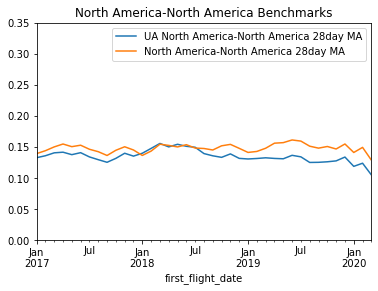

In [28]:
# Plot airline and Skytra benchmark
plt.close('all')
for region in regions:
    print('Plotting {0} vs regional monthly benchmark graphs for {1}'.format(airline, region))
    
    #ma_region_name=region+' {0}day MA'.format(rolling_window)
    
    airline_plot_df=pd.DataFrame()
    airline_plot_df[airline+' '+ma_region_name]=monthly_airline_modelled_skytra_df[region]
    airline_plot_df[ma_region_name]=monthly_modelled_skytra_df[region]
    airline_plot_df.plot(ylim = [0, 0.35], legend=True, title=region+' Benchmarks')
    #plt.close('all')

## Slope and intercept results 2017-2020

In [29]:
lin_reg_params_df=pd.DataFrame(index=['slope', 'intercept'])

for region in regions:
    
    print('Calibrating the linear regression model for {0}'.format(region))
    
    x_data=monthly_modelled_skytra_df[[region]]
    y_data=monthly_airline_modelled_skytra_df[region]

    # the lin reg model calibration
    clf = linear_model.LinearRegression()
    clf.fit(x_data, y_data)

    lin_reg_params_df.loc['slope', region]=clf.coef_[0]
    lin_reg_params_df.loc['intercept', region]=clf.intercept_
    lin_reg_params_df.loc['R^2', region]=clf.score(x_data,y_data)
    lin_reg_params_df.loc['correlation', region]=scipy.stats.pearsonr(monthly_modelled_skytra_df[region],
                                                                      monthly_airline_modelled_skytra_df[region])[0]
    
lin_reg_params_df

Calibrating the linear regression model for North America-North America


,North America-North America
slope,0.659076
intercept,0.037435
R^2,0.199075
correlation,0.446179


## Slope and intercept results 2017-2019

In [30]:
monthly_airline_modelled_skytra_df_2019=monthly_airline_modelled_skytra_df.loc[datetime.date(2017,1,1):datetime.date(2019,12,31),:]
monthly_modelled_skytra_df_2019=monthly_modelled_skytra_df.loc[datetime.date(2017,1,1):datetime.date(2019,12,31),:]

In [31]:
lin_reg_params_df=pd.DataFrame(index=['slope', 'intercept'])

for region in regions:
    
    print('Calibrating the linear regression model for {0}'.format(region))
    
    x_data=monthly_modelled_skytra_df_2019[[region]]
    y_data=monthly_airline_modelled_skytra_df_2019[region]

    # the lin reg model calibration
    clf = linear_model.LinearRegression()
    clf.fit(x_data, y_data)

    lin_reg_params_df.loc['slope', region]=clf.coef_[0]
    lin_reg_params_df.loc['intercept', region]=clf.intercept_
    lin_reg_params_df.loc['R^2', region]=clf.score(x_data,y_data)
    lin_reg_params_df.loc['correlation', region]=scipy.stats.pearsonr(monthly_modelled_skytra_df_2019[region],
                                                                      monthly_airline_modelled_skytra_df_2019[region])[0]
    
lin_reg_params_df

Calibrating the linear regression model for North America-North America


,North America-North America
slope,0.315727
intercept,0.089755
R^2,0.053853
correlation,0.232063
